# Esplorazione-Preprocessing

In [1]:
#importing libraries

from __future__ import absolute_import, print_function
import tweepy
from tweepy import OAuthHandler
from tweepy import Stream
import json
from pymongo import MongoClient
import numpy as np
import pandas as pd
import re
import math
import time
import calendar
import datetime
import matplotlib
import matplotlib.pyplot as plt

In [2]:
doc2=pd.read_csv('NBA_tweets.csv')
doc2

,_id,created_at,text,user.name,user.screen_name,user.location,user.followers_count,user.friends_count
0,ObjectId(5d02d1dd463bf951e4db5dd3),Thu Jun 13 22:44:38 +0000 2019,The staff that cleared his medical better be p...,Dan Woo,danwoo91,Canada,76.0,146.0
1,ObjectId(5d02d1dd463bf951e4db5dd5),Thu Jun 13 22:44:38 +0000 2019,RT @Cash_MoneyPicks: MLB:NBA Free 🏀⚾️ Picks\nW...,Randizzle,Teammoneypicks,Randizzlesplays@Gmail.com,760.0,1478.0
2,ObjectId(5d02d1dd463bf951e4db5dd7),Thu Jun 13 22:44:39 +0000 2019,Jameer Nelson was hurt most of that year start...,Jamaican King 🇯🇲,_KarateChris,the 3rd dimension,2767.0,2210.0
3,ObjectId(5d02d1de463bf951e4db5dd9),Thu Jun 13 22:44:39 +0000 2019,If Nets Let DLo Go Because Of This Nigga Ima B...,ANTI 🏁.,ANT1TREMAYNE,NaN,102.0,105.0
4,ObjectId(5d02d1de463bf951e4db5ddb),Thu Jun 13 22:44:40 +0000 2019,RT @MatchupBR: Basquetebol: o esporte mais bon...,Do Afa✌😍,ElissonHerneck,"Mesquita, Brasil",241.0,828.0
5,ObjectId(5d02d1df463bf951e4db5ddd),Thu Jun 13 22:44:40 +0000 2019,なんやねん（なんやねん）,ゆうや,mosingleton777,NaN,232.0,304.0
6,ObjectId(5d02d1df463bf951e4db5ddf),Thu Jun 13 22:44:40 +0000 2019,I’m cryinnnggggg. I love NBA young boy but lor...,muvaaaaaK 👸🏽👑,STARthaPlaya,In These Bitches Search Bar.,787.0,397.0
7,ObjectId(5d02d1df463bf951e4db5de1),Thu Jun 13 22:44:40 +0000 2019,RT @CityofEdmonton: Canada 🇨🇦 is on board! Fro...,Allen Jerome Llenes,AJLlenes,NaN,19.0,179.0
8,ObjectId(5d02d1df463bf951e4db5de3),Thu Jun 13 22:44:40 +0000 2019,RT @BenStinar: People shame Dwight Howard when...,underdog,__savvyy,NaN,639.0,543.0
9,ObjectId(5d02d1df463bf951e4db5de5),Thu Jun 13 22:44:40 +0000 2019,Report: Kyrie preparing to sign with Nets\nhtt...,Miri,Shamz325,NaN,29.0,314.0


# Leggo i dati rendendo 'created_at' datetime e ponendola come indice

In [3]:
d=pd.read_csv('NBA_tweets.csv',parse_dates=['created_at'], index_col=1)

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


Text(0, 0.5, 'n of tweet')

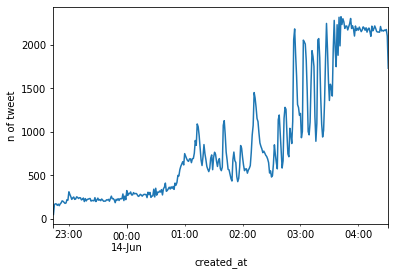

In [5]:
d = d.dropna()
a = d.resample('1T').count().text.plot()
a.set_ylabel("n of tweet")

In [7]:
#seleziono i dati nella zona d'interesse
lt = d.loc['2019-06-14 00:45:00+00:00':'2019-06-14 03:42:59+00:00',:]

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


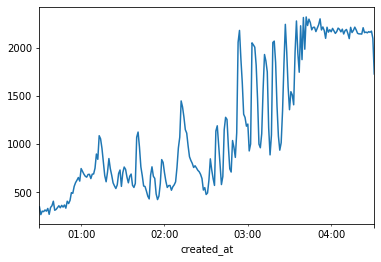

In [8]:
a = lt.resample('1T').count().text.plot()
a.set_ylabel("n of tweet")

In [9]:
lt

,_id,text,user.name,user.screen_name,user.location,user.followers_count,user.friends_count
created_at,,,,,,,
2019-06-14 00:30:00+00:00,ObjectId(5d02ea8e463bf951e4dc6b95),#NBA Lo que cuesta la lesión de Kevin Durant h...,El Venezolano,elvenezolanoweb,Venezuela,14137.0,257.0
2019-06-14 00:30:00+00:00,ObjectId(5d02ea8e463bf951e4dc6b97),30 minutes before game 6: They don’t call them...,IDS Sports,ids_sports,"Bloomington, Indiana",7200.0,303.0
2019-06-14 00:30:00+00:00,ObjectId(5d02ea8e463bf951e4dc6b99),"""It's been as dramatic an NBA finals as we cou...",Off The Ball,offtheball,🎙 - 📻 - 🎧 - 🎥,99264.0,1273.0
2019-06-14 00:30:00+00:00,ObjectId(5d02ea8e463bf951e4dc6b9b),"Com 31 PTS, 8 REB e 7 AST, @StephenCurry30 com...",NBA Brasil,NBABrasil,Brasil,265299.0,1157.0
2019-06-14 00:30:00+00:00,ObjectId(5d02ea8e463bf951e4dc6b9d),Warriors set for emotional NBA Finals showdown...,fastbreak,FastBreakPHNews,NaN,4482.0,634.0
2019-06-14 00:30:00+00:00,ObjectId(5d02ea8e463bf951e4dc6b9f),😍 Plus que 30 minutes avant le game 6 l'équipe...,Betclic France,Betclic,"Paris, France",130964.0,312.0
2019-06-14 00:30:00+00:00,ObjectId(5d02ea8e463bf951e4dc6ba1),"An NBA Reporter at Yahoo, @seeratsohi joins So...",Front Office Sports,frntofficesport,info@frntofficesport.com,33948.0,2512.0
2019-06-14 00:30:00+00:00,ObjectId(5d02ea8e463bf951e4dc6ba3),Kawhi Leonard has a 40% chance to score the mo...,Thom J. K. Cunningham,_TJKC_,United States,268.0,95.0
2019-06-14 00:30:00+00:00,ObjectId(5d02ea8e463bf951e4dc6ba5),RT @NBAHistory: “BANG... TIE GAME!” \n\nRay Al...,Asgär👨🏻‍✈️,Jinsanniittyy,🇵🇭🇺🇸,742.0,644.0


# Esploriamo la distribuzione degli hashtags nei tweet

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


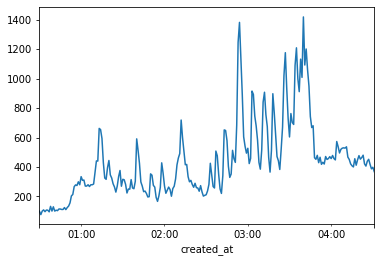

In [10]:
#plotto solo quelli che contengono #NBAFinals
sub =lt[lt['text'].str.contains('#NBAFinals')]
sub.resample('1T').count().text.plot()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


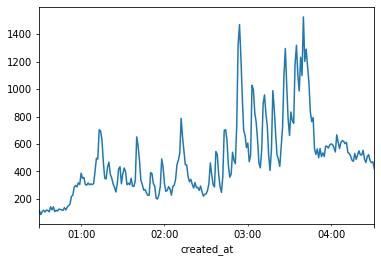

In [11]:
sub =lt[lt['text'].str.contains('#NBA')]
sub.resample('1T').count().text.plot()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


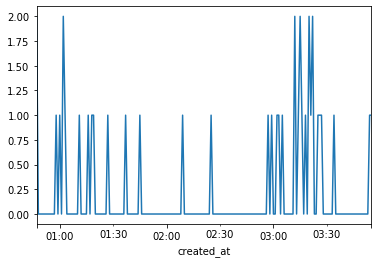

In [12]:
#nessuno ha messo NBAplayoffs
sub =lt[lt['text'].str.contains('#NBAplayoffs')]
sub.resample('1T').count().text.plot()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


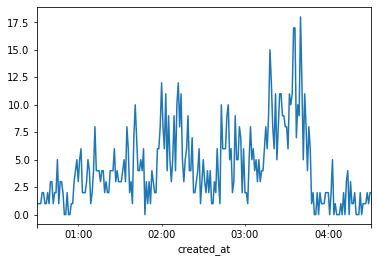

In [13]:
#pochi GoldenStateWarriors
sub =lt[lt['text'].str.contains('#GoldenStateWarriors')]
sub.resample('1T').count().text.plot()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


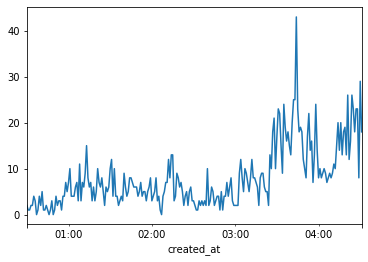

In [14]:
#Di più per i Toronto Raptors
sub =lt[lt['text'].str.contains('#TorontoRaptors')]
sub.resample('1T').count().text.plot()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


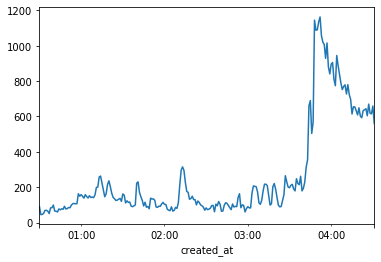

In [15]:
#ancora di più per la sola parola 'Raptors'
sub =lt[lt['text'].str.contains('Raptors')]
sub.resample('1T').count().text.plot()

# Cerchiamo di separare le varie parti della partita
# 1 quarto

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


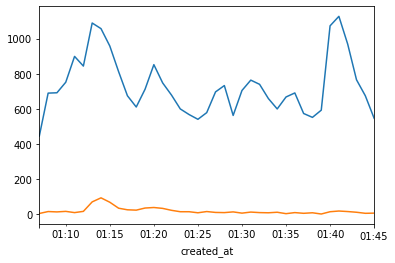

In [16]:
game1 = lt.loc['2019-06-14 01:00:00+00:00':'2019-06-14 01:45:00+00:00',:]

game1.resample('1T').count().text.plot()

# 2 quarto + intervallo

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


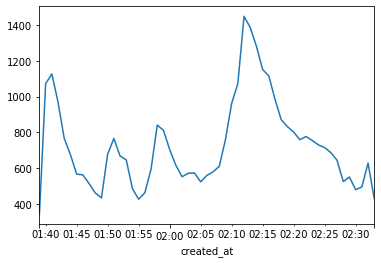

In [17]:
game2 = lt.loc['2019-06-14 01:40:00+00:00':'2019-06-14 02:30:00+00:00',:]

game2.resample('1T').count().text.plot()

# 3 quarto

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


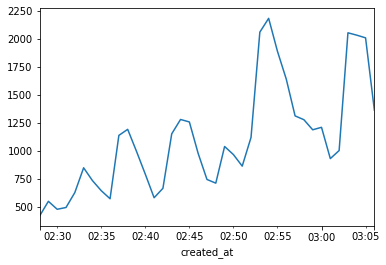

In [18]:
game3 = lt.loc['2019-06-14 02:25:00+00:00':'2019-06-14 03:10:00+00:00',:]
game3.resample('1T').count().text.plot()

# Infortunio di Klay
# Interessante sottolinearlo

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


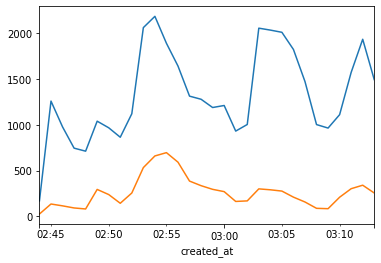

In [19]:
#quando Klay si infortuna

game3 = lt.loc['2019-06-14 02:40:00+00:00':'2019-06-14 03:15:00+00:00',:]

a =game3.resample('1T').count().text.plot(label='tweet totali')
clay=game3[game3['text'].str.contains('Klay')]
a =clay.resample('1T').count().text.plot(label='Klay')
a.set_ylabel("n of tweet")
a.legend()

# 4 quarto

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


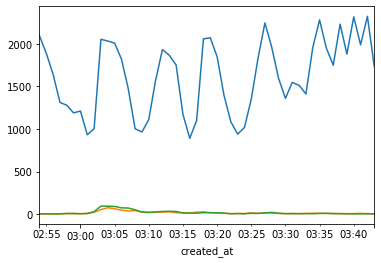

In [20]:
game4 = lt.loc['2019-06-14 02:55:00+00:00':,:]

game4.resample('1T').count().text.plot()
q4 =game4[game4['text'].str.contains('4th')]      #vediamo se riusciamo a farci un'idea di quando inizia con i tweet
q1 =game4[game4['text'].str.contains('quarter')]
q4.resample('1T').count().text.plot()
q1.resample('1T').count().text.plot()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


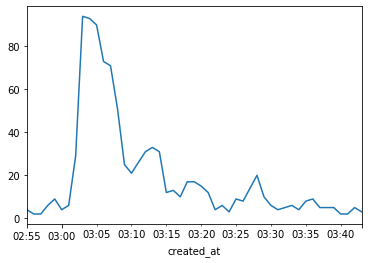

In [21]:
#Pausa tra il terzo e il quarto tempo

startr =game4[game4['text'].str.contains('quarter')]
startr.resample('1T').count().text.plot()

# Interessanti da mostrare: Lowry, Klay

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


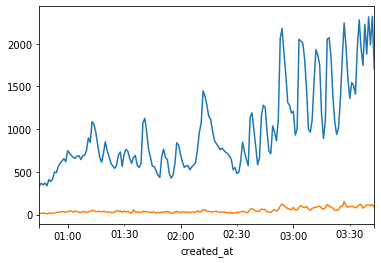

In [23]:
a = lt.resample('1T').count().text.plot(label='tweet totali')
startr =lt[lt['text'].str.contains("Klay")] 
a = startr.resample('1T').count().text.plot(label='Klay')
startr2 =lt[lt['text'].str.contains("Lowry")] 
a = startr2.resample('1T').count().text.plot(label='Lowry')
lt=lt.drop('_id',axis=1)  #droppo la colonna _id

a.set_ylabel("n of tweet")
a.legend()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


Text(0, 0.5, 'n of tweet')

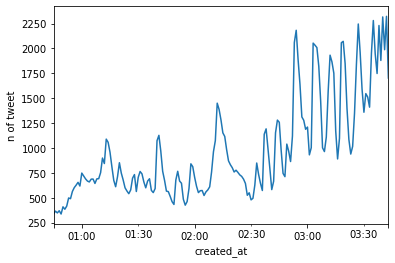

In [25]:
a = lt.resample('1T').count().text.plot()
a.set_ylabel("n of tweet")

# Scrivo i dataset da visualizzare con Tableau

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\pandas\plotting\_core.py:523: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001A373053B00> has a label of '_id' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc='best', title=title)


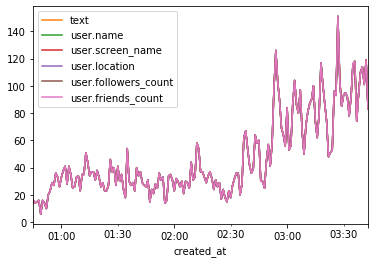

In [26]:
#Qui posso salvare i vari dati con cui successivamente creerò le infografiche.
#in questo caso sto salvando i dati generali

u = lt.resample('1T').count()

In [27]:
#salvo i dati definiti sopra

u.to_csv(r'C:/Users/user1/Desktop/Università/Data Management/datiNBA/usefuldata.csv',index=True)

# Per visualizzare i tweet pubblicati dalla pagina NBA ufficiale

In [ ]:
lt[lt['user.screen_name']=='NBA']

# Per trovare il numero di tweet generato per giocatore

In [29]:
lt[lt['text'].str.contains("Klay")].text.count()

14966